These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.
The attributes are:
- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

# Objective


The objective of this problem is to reduce the number of features by using dimensionality reduction techniques such as PCA and t-SNE, and extract insights about the data.

importing libaries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
# Importing PCA and t-SNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Silhouette score
from sklearn.metrics import silhouette_score


In [6]:
# mounting the drive
# from google.colab import drive
# drive.mount('/content/drive')

# importing the data

In [7]:
data = pd.read_csv('/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv')

In [8]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Data exploratory and preprocessing

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


- There are 13 columns, which are wine features
- There are 178 rows, which are different wines
- The data is numerical
- There are no missing values in the data

In [10]:
data[data.duplicated()]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


There are no duplicated rows in the data

# data analysis

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


Alcohol
Skew : -0.05


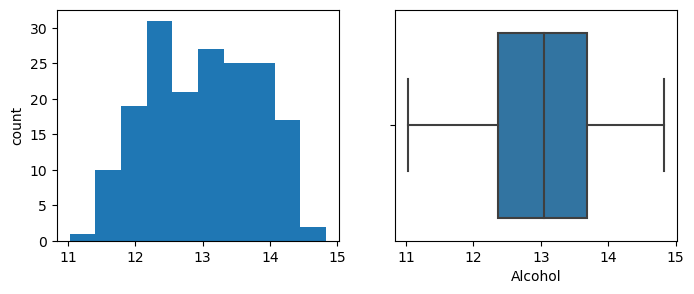

Malic_Acid
Skew : 1.04


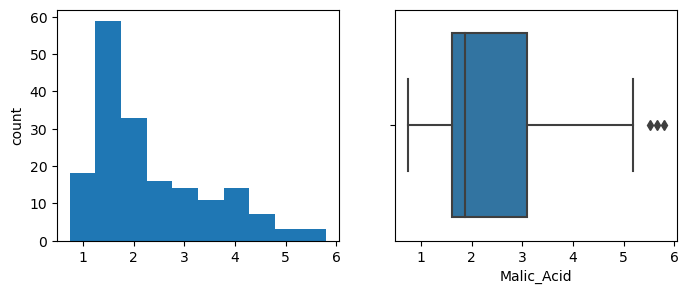

Ash
Skew : -0.18


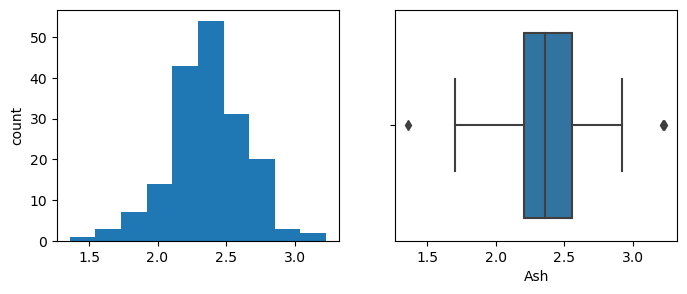

Ash_Alcanity
Skew : 0.21


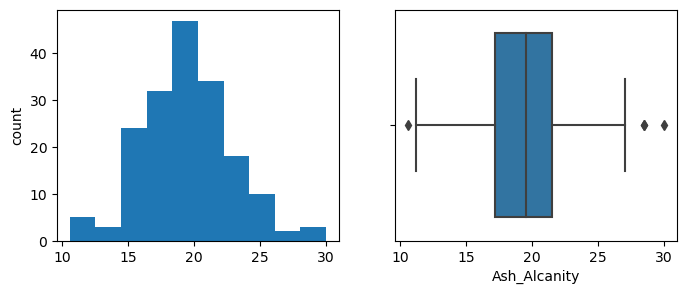

Magnesium
Skew : 1.1


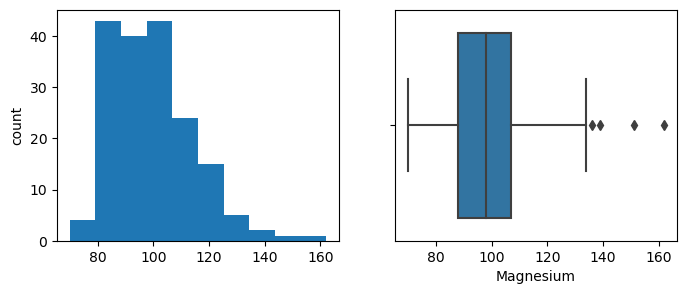

Total_Phenols
Skew : 0.09


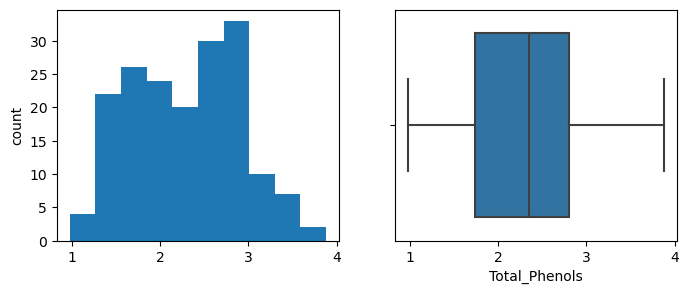

Flavanoids
Skew : 0.03


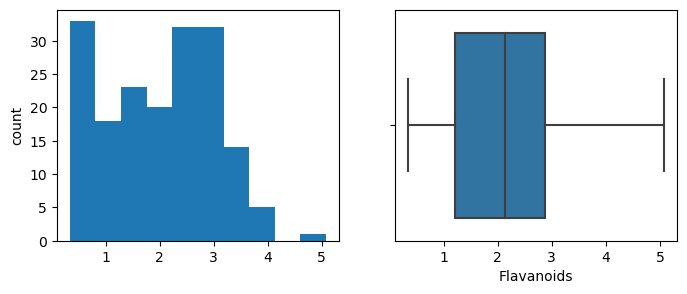

Nonflavanoid_Phenols
Skew : 0.45


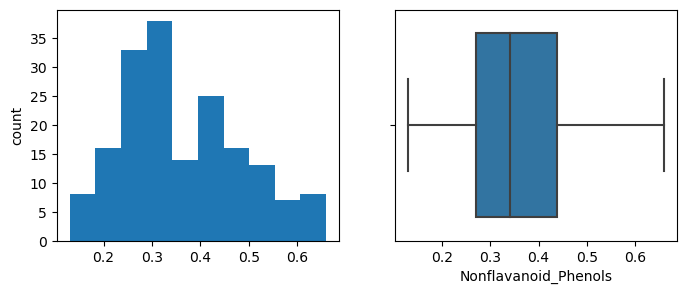

Proanthocyanins
Skew : 0.52


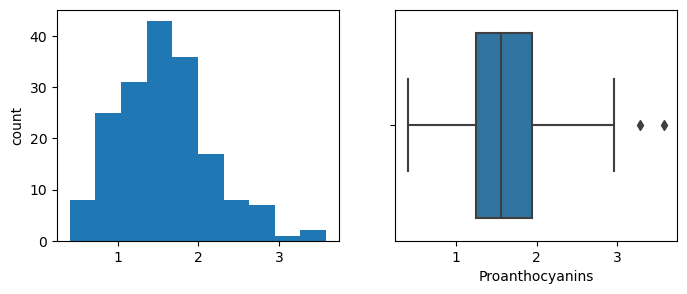

Color_Intensity
Skew : 0.87


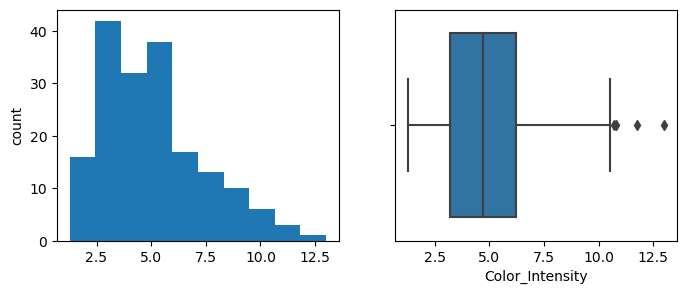

Hue
Skew : 0.02


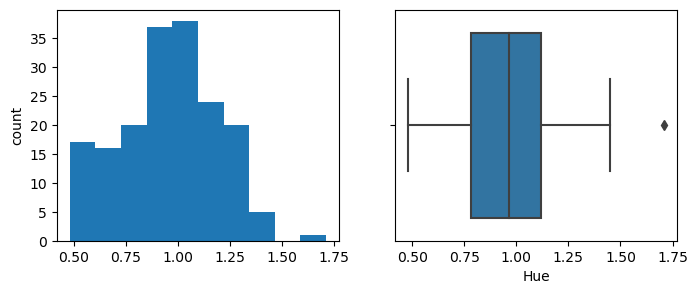

OD280
Skew : -0.31


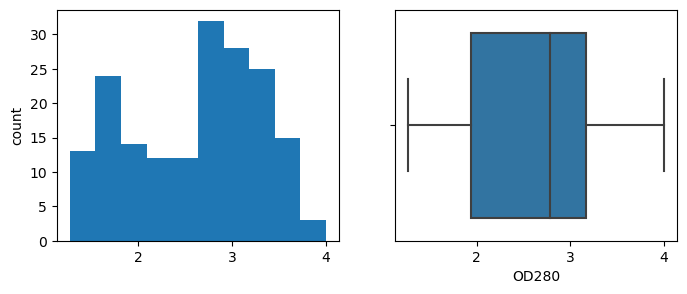

Proline
Skew : 0.77


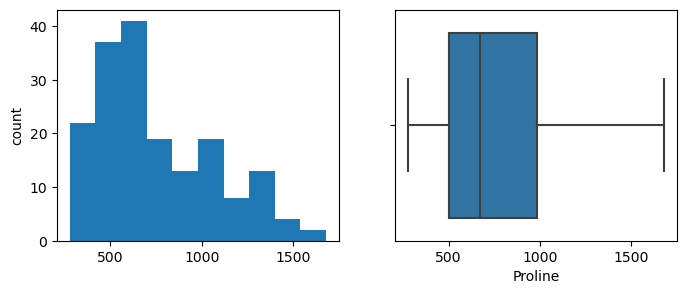

In [12]:
# Univariate Analysis
cols = data.columns
for col in cols:
    print(col)  
    print('Skew :',round(data[col].skew(), 2))   
    plt.figure(figsize = (8, 3))    
    plt.subplot(1, 2, 1)   
    data[col].hist(bins = 10, grid = False)  
    plt.ylabel('count')   
    plt.subplot(1, 2, 2)  
    sns.boxplot(x = data[col])  
    plt.show()

- Malic_Acid, Magnesium, Proanthocyanins, Color_Intensity, and Proline variables show moderately to high right-skewed distribution.
- There is a small number of outliers in the data

<AxesSubplot:>

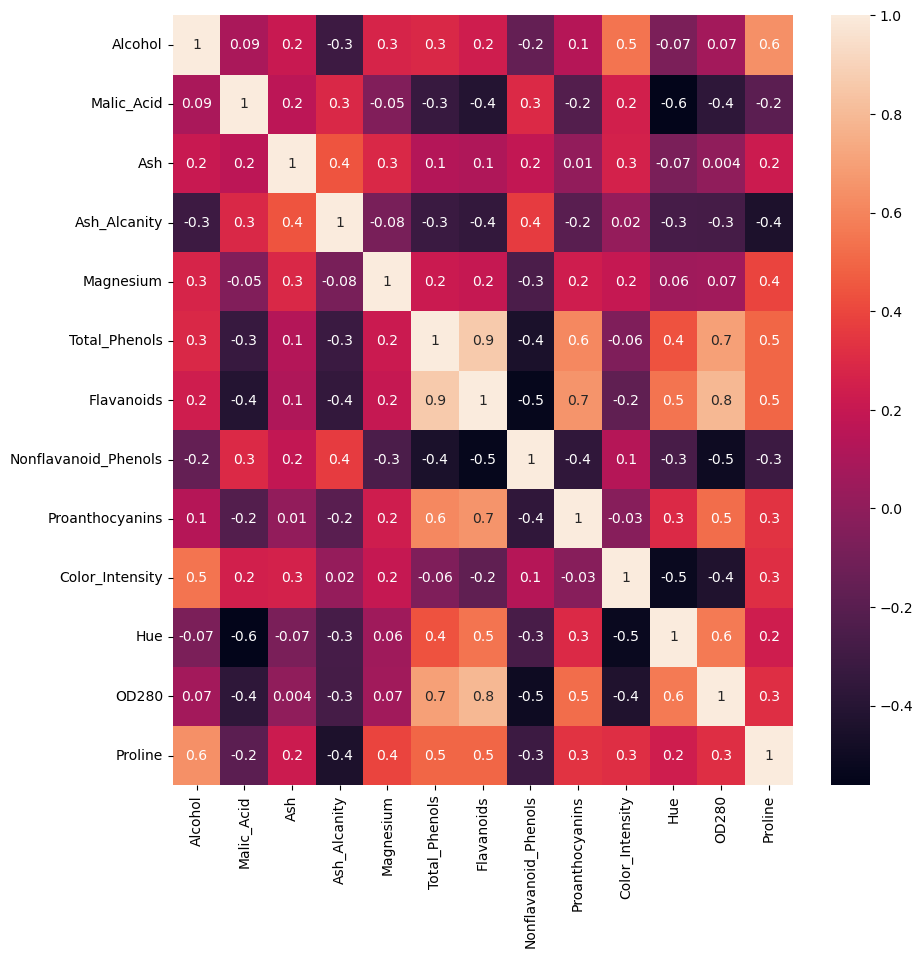

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.1g')

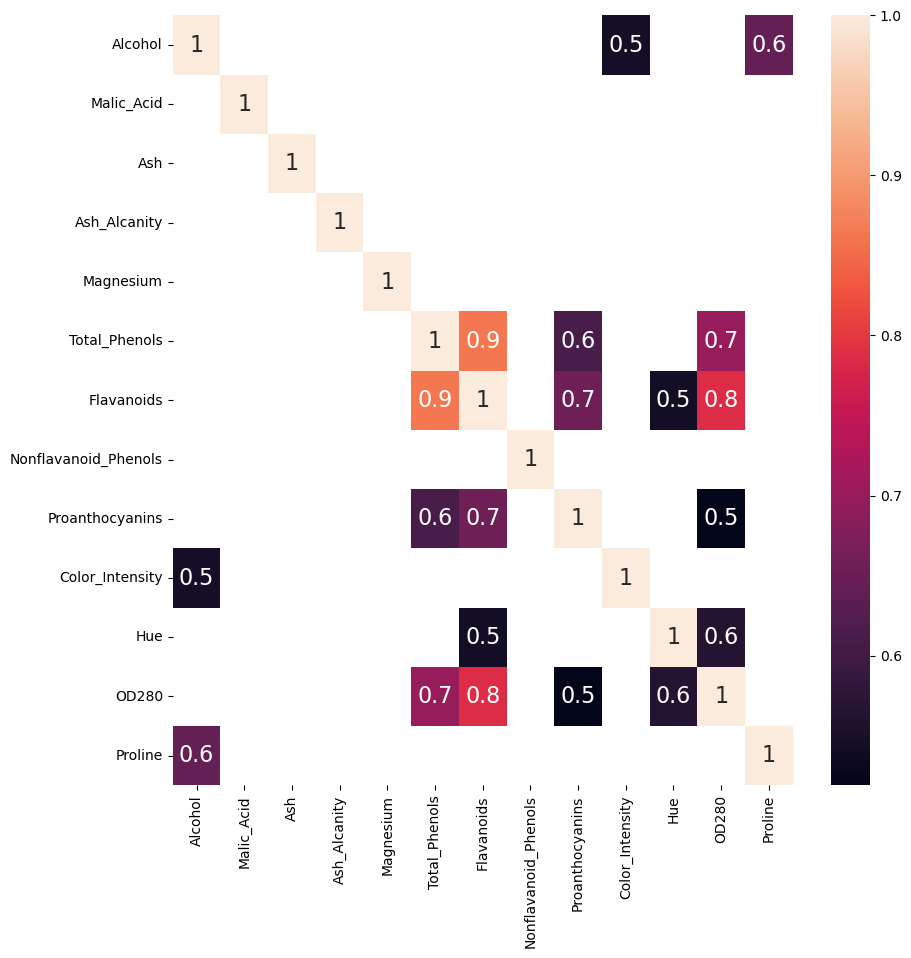

In [14]:
M = data.corr()[data.corr() > .5]
plt.figure(figsize=(10,10))
sns.heatmap(M, annot=True, fmt='.1g', annot_kws={'fontsize':16})

plt.show()


- There is a strong positive correlation between Flavanoids and total_ phenols. This makes sense since Flavanoids have phenolic structures.
-  There is a strong positive correlation between Flavanoids, total_ phenols, and OD280. OD 280 meusres Protein concentration.  flavonoids can bind to proteins. 
- There is a strong positive correlation between Flavanoids and Proanthocyanidins. Proanthocyanidins are plant pigments and are a subclass of flavonoids.

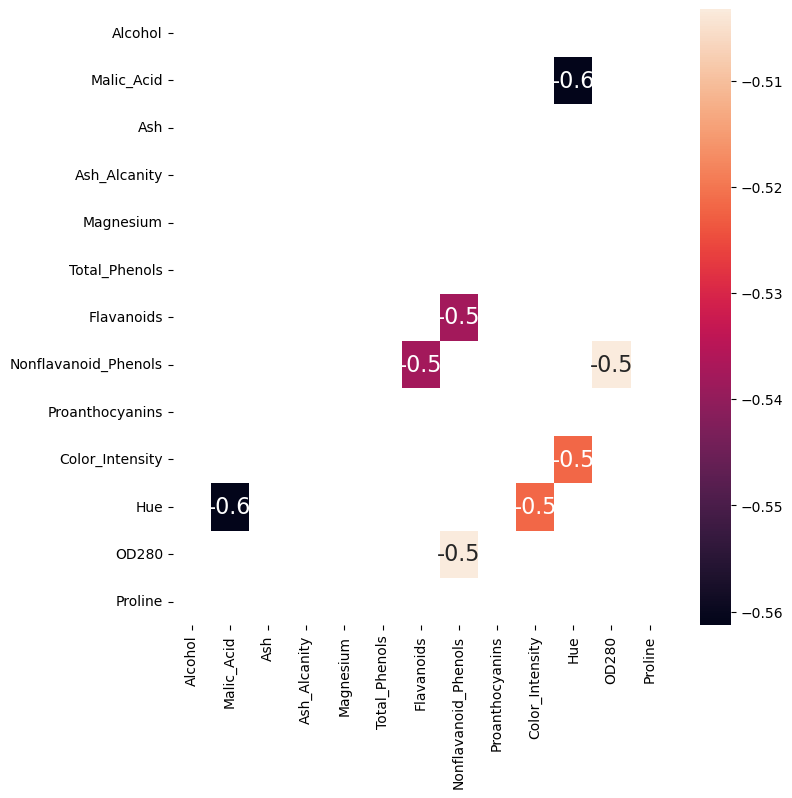

In [15]:
M = data.corr()[data.corr() < -.5]
plt.figure(figsize=(8,8))
sns.heatmap(M, annot=True, fmt='.1g', annot_kws={'fontsize':16})
plt.show()


- There is a strong negative correlation between Malic_acid and Hue. 

# Scaling the data

In [16]:
# Scaling the data and storing the output as a new DataFrame

scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

data_scaled.head().T

,0,1,2,3,4
Alcohol,1.518613,0.246290,0.196879,1.691550,0.295700
Malic_Acid,-0.562250,-0.499413,0.021231,-0.346811,0.227694
Ash,0.232053,-0.827996,1.109334,0.487926,1.840403
Ash_Alcanity,-1.169593,-2.490847,-0.268738,-0.809251,0.451946
Magnesium,1.913905,0.018145,0.088358,0.930918,1.281985
Total_Phenols,0.808997,0.568648,0.808997,2.491446,0.808997
Flavanoids,1.034819,0.733629,1.215533,1.466525,0.663351
Nonflavanoid_Phenols,-0.659563,-0.820719,-0.498407,-0.981875,0.226796
Proanthocyanins,1.224884,-0.544721,2.135968,1.032155,0.401404
Color_Intensity,0.251717,-0.293321,0.269020,1.186068,-0.319276


# Principal Component Analysis

In [17]:
data_scaled.shape

(178, 13)

In [18]:
# Defining the number of principal components to generate
n = data_scaled.shape[1] #1= taing the number of columans. shape function gives the number of rows and then number of columans

# Finding principal components for the data
pca1 = PCA(n_components = n, random_state = 1)
data_pca = pd.DataFrame(pca1.fit_transform(data_scaled))

# The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_

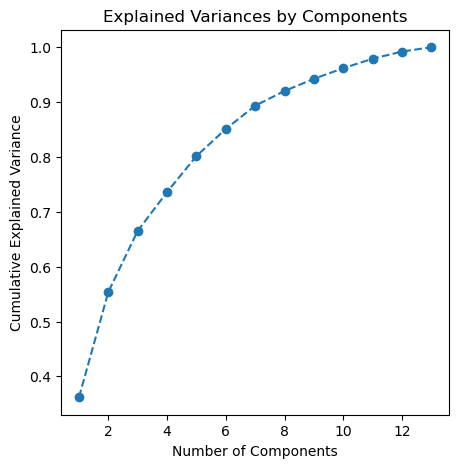

In [19]:
# # Visualize the explained variance by individual components
plt.figure(figsize = (5, 5))
plt.plot([i+1 for i in range(data_scaled.shape[1])], pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

5 PCs are explaining at least 80% variance

In [20]:
# Making a new dataframe with first 5 principal components as columns and original features as indices
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
# Convert to dataframe
pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:5], 2), index = data_scaled.columns, columns = cols)
pc1

,PC1,PC2,PC3,PC4,PC5
Alcohol,0.14,-0.48,-0.21,-0.02,-0.27
Malic_Acid,-0.25,-0.22,0.09,0.54,0.04
Ash,-0.00,-0.32,0.63,-0.21,-0.14
Ash_Alcanity,-0.24,0.01,0.61,0.06,0.07
Magnesium,0.14,-0.30,0.13,-0.35,0.73
Total_Phenols,0.39,-0.07,0.15,0.20,-0.15
Flavanoids,0.42,0.00,0.15,0.15,-0.11
Nonflavanoid_Phenols,-0.30,-0.03,0.17,-0.20,-0.50
Proanthocyanins,0.31,-0.04,0.15,0.40,0.14
Color_Intensity,-0.09,-0.53,-0.14,0.07,-0.08


In [21]:
pc1_high_positive_val = pc1.where(pc1 > 0.3, other=' ')
pc1_high_positive_val

,PC1,PC2,PC3,PC4,PC5
Alcohol,,,,,
Malic_Acid,,,,0.54,
Ash,,,0.63,,
Ash_Alcanity,,,0.61,,
Magnesium,,,,,0.73
Total_Phenols,0.39,,,,
Flavanoids,0.42,,,,
Nonflavanoid_Phenols,,,,,
Proanthocyanins,0.31,,,0.4,
Color_Intensity,,,,,


In [22]:
pc1_low_negative_val = pc1.where(pc1 < -0.3, other=' ')
pc1_low_negative_val

,PC1,PC2,PC3,PC4,PC5
Alcohol,,-0.48,,,
Malic_Acid,,,,,
Ash,,-0.32,,,
Ash_Alcanity,,,,,
Magnesium,,,,-0.35,
Total_Phenols,,,,,
Flavanoids,,,,,
Nonflavanoid_Phenols,,,,,-0.5
Proanthocyanins,,,,,
Color_Intensity,,-0.53,,,


- Based on these high positive and low negative correlation values we can see what components are explaining the variance in the original dimensions. 

# K-Means Clustering

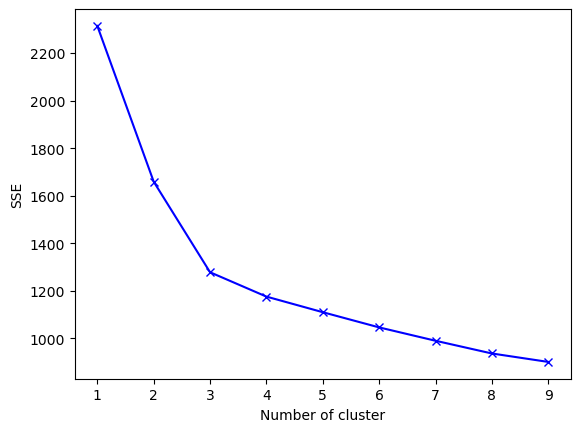

In [23]:
# Empty dictionary to store the SSE for each value of K
sse = {} 

# Iterate for a range of Ks and fit the scaled data to the algorithm. 
# Use inertia attribute from the clustering object and store the inertia value for that K 
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(data_scaled)
    
    sse[k] = kmeans.inertia_
# Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

The plot shows that there is a consistent dip from 3 to 9 and there doesn't seem to be a clear 'elbow' here. We may choose any number of clusters from 3 to 9.
So, let's look at another method to get a 'second opinion'. Let's create a plot with Silhouette scores to see how it varies with K.

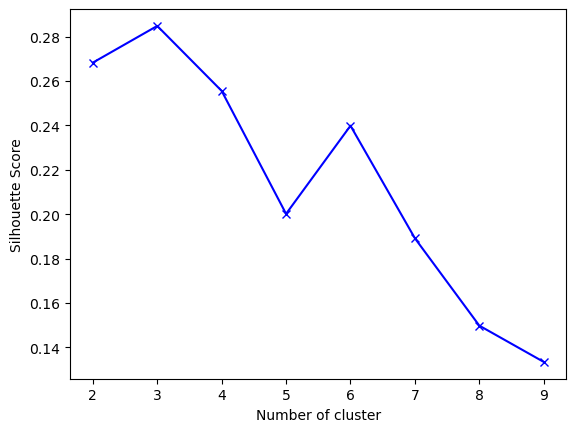

In [24]:
# Empty dictionary to store the Silhouette score for each value of K
sc = {} 

# Iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that K 
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

# Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

The plot shows that the silhouette score is the highest for K=3. Let's first look at these 3 clusters.

In [25]:
# Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep = True)

In [26]:
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(data_scaled)
# Adding predicted labels to the original data and the scaled data 
data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)
data['KMeans_Labels'] = kmeans.predict(data_scaled)

In [27]:
data['KMeans_Labels'].value_counts()

0    65
2    62
1    51
Name: KMeans_Labels, dtype: int64

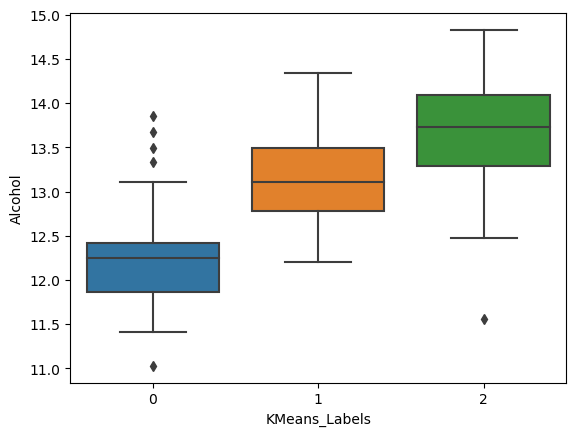

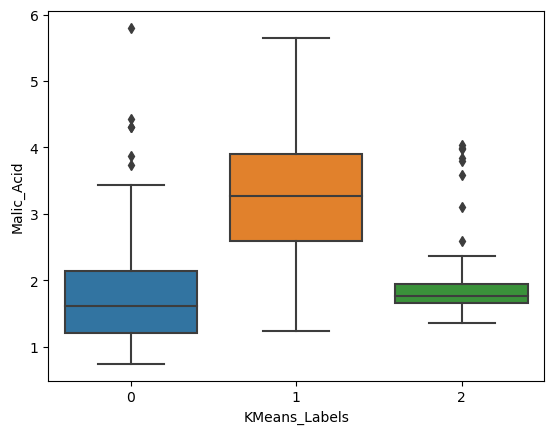

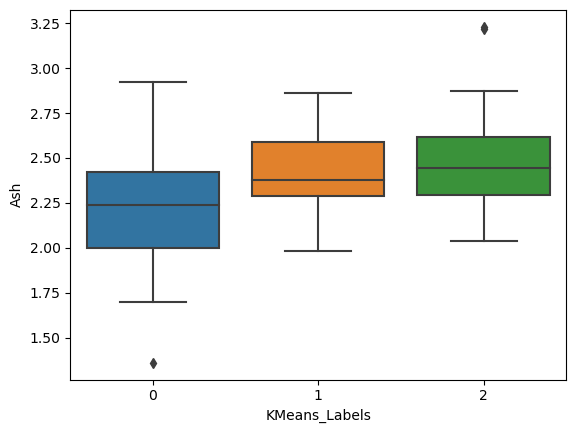

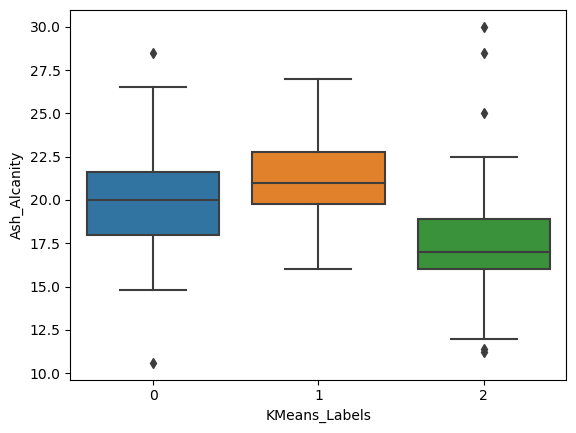

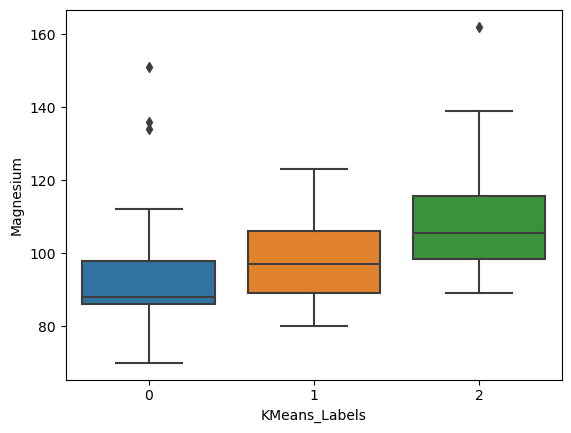

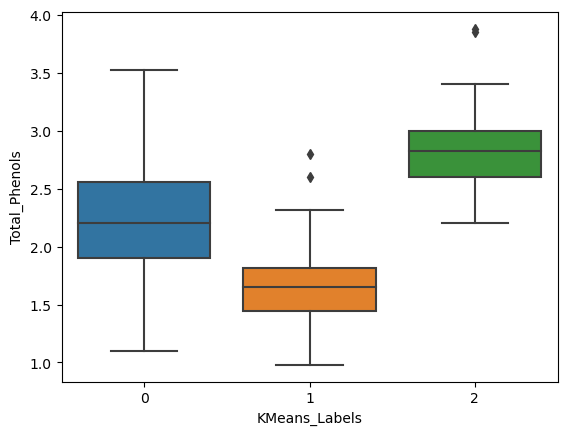

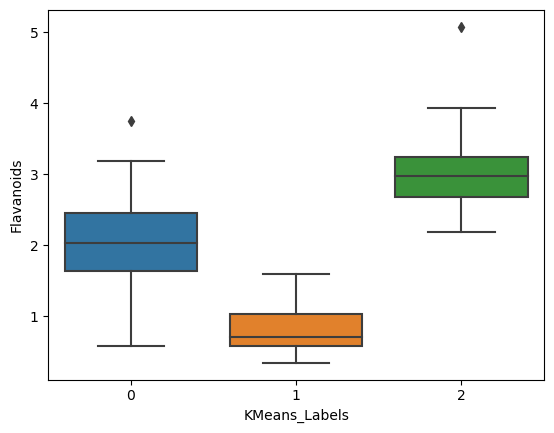

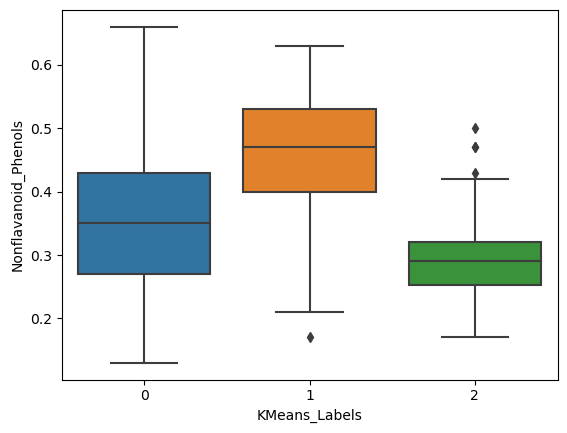

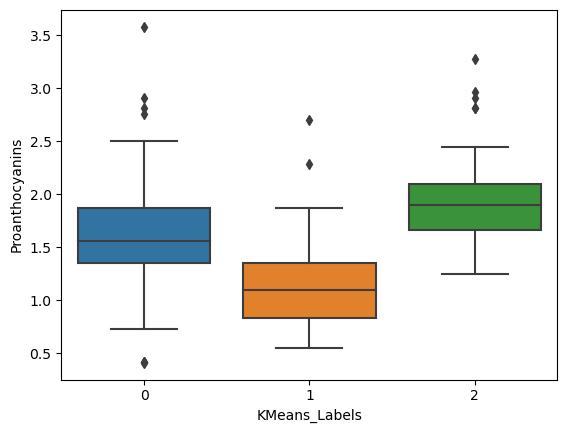

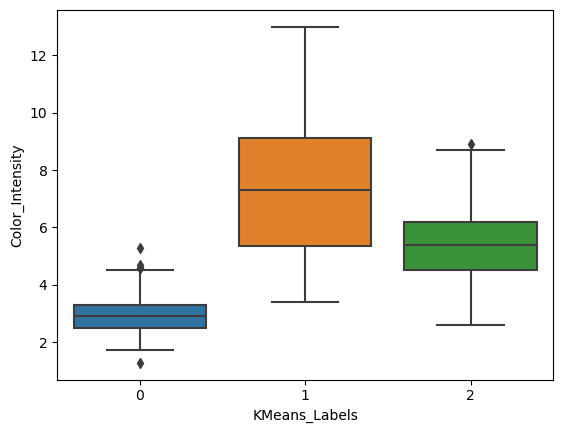

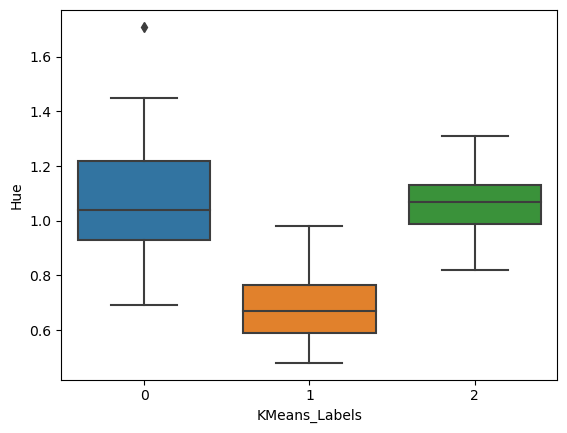

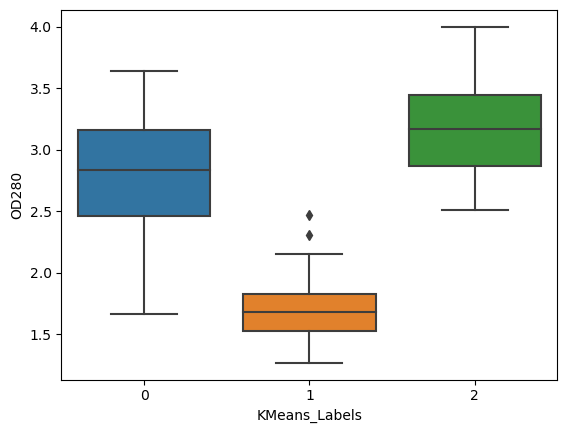

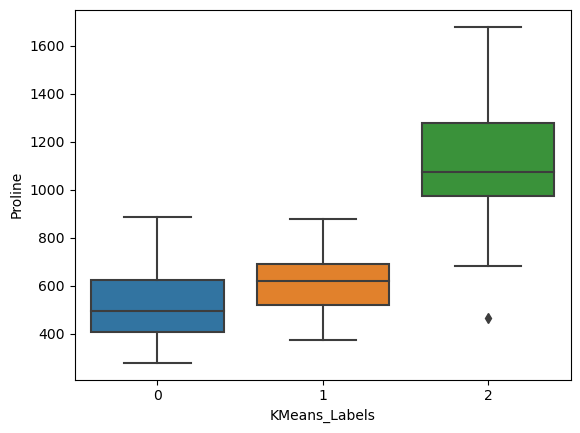

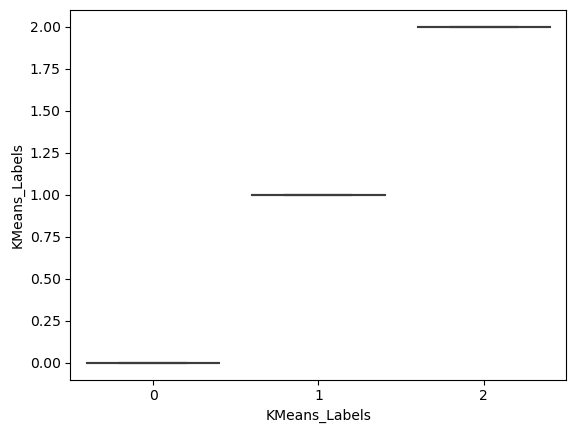

In [28]:
cols = data.columns
for col in cols:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = data)
    plt.show()

clusters profile:
- cluster 1 seems to have the highest alcohol level (avg ~13.7), average ash of ~2.5, highest total phenol rate ( avg ~3), lowest Nonflavoanoids phenols (avg ~0.3), avg color intensity of 5, highest OD280 (avg ~3.25), highest proline rate (avg ~1100)
- cluster 2 seems to have the mid alcohol level among the 3 clusters (avg ~13.2), the highest malic acid rate (avg ~3.5), the lowest total phenol rate (avg ~1.5), the highest nonflavonoid phenol rate (avg ~5), the lowest proanthocyanins rate (avg ~1), highest color intensity (avg ~7), lowest hue rate (avg ~7), lowest od280 (avg ~1.75)
- cluster 3 seems to have the lowest alcohol level (avg ~2.5), lowest magnesium rate (avg ~0), medium rate of total phenols (avg ~2.1), medium rate of flavonoids (avg ~2), lowest color intensity (avg ~3), medium rate of od280 (avg ~3), the lowest rate of proline (avg ~500)
- in general the clusters are quite balanced and the variance is not very high. 

# t-SNE

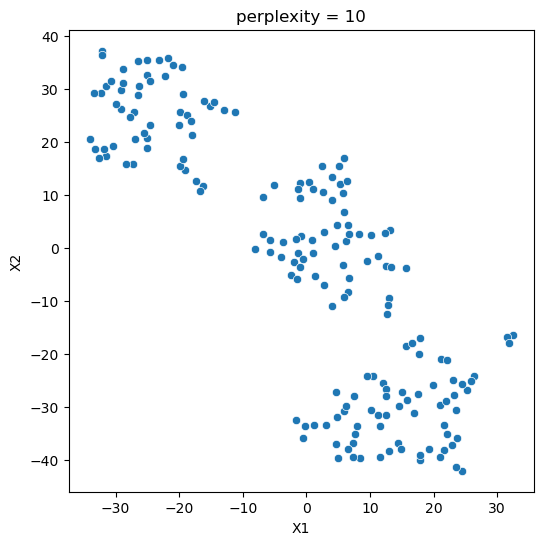

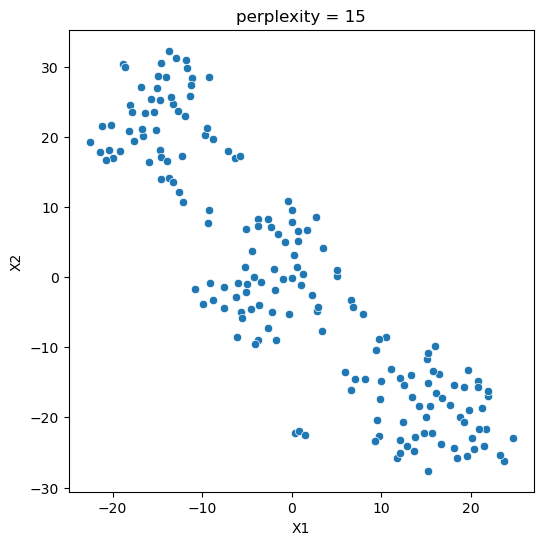

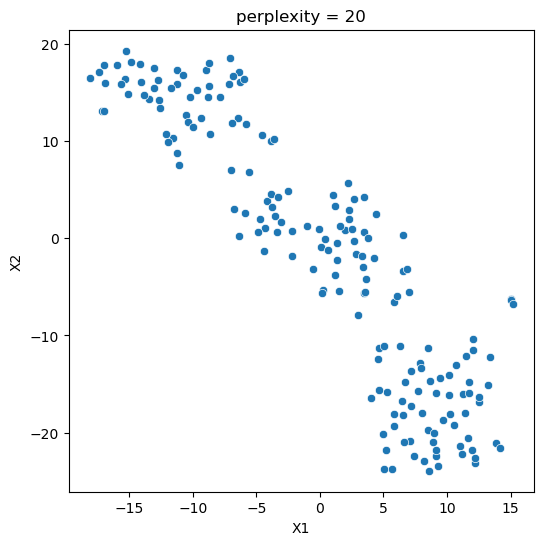

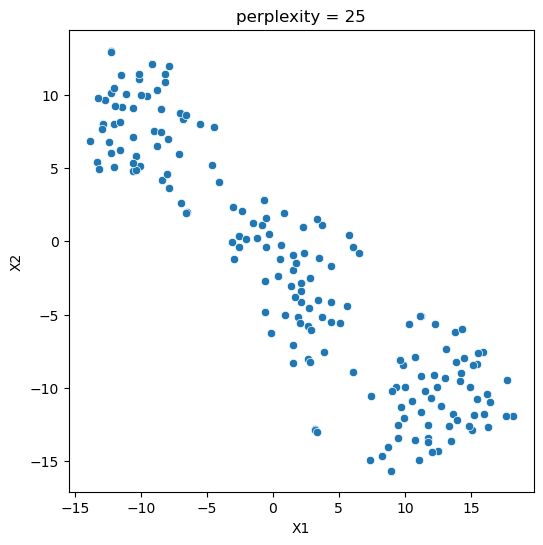

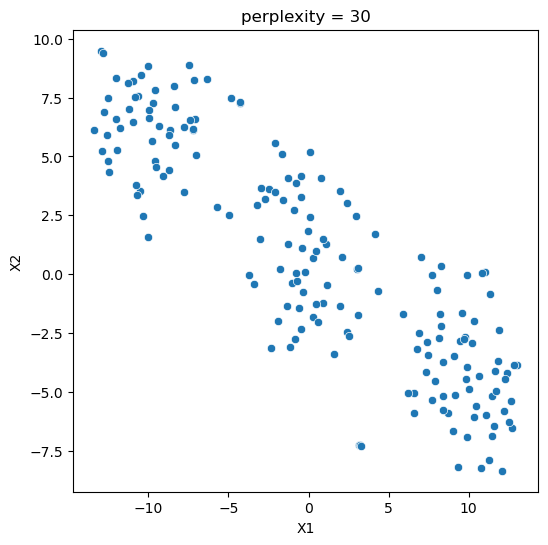

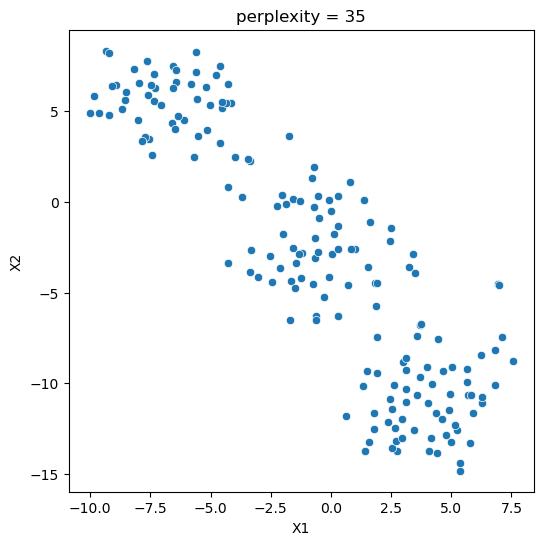

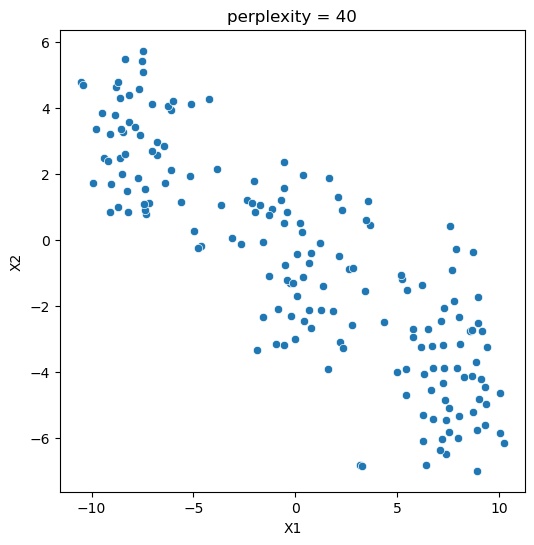

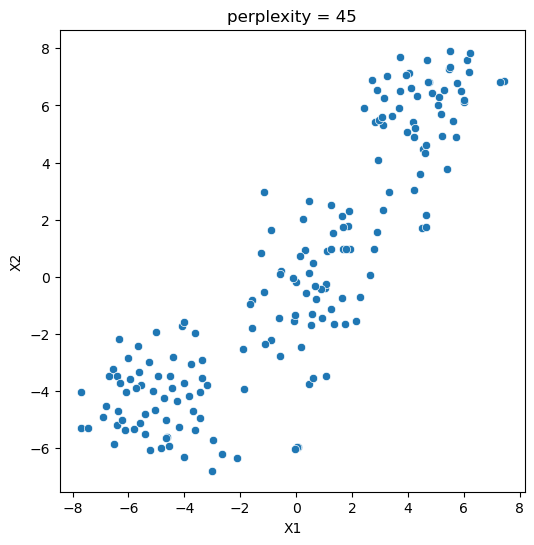

In [29]:
for i in range(10, 50, 5):
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)
    data_tsne = tsne.fit_transform(data_scaled)
    data_tsne = pd.DataFrame(data_tsne)
    data_tsne.columns = ['X1', 'X2']
    plt.figure(figsize = (6,6))
    sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)
    plt.title("perplexity = {}".format(i))

Observations:

some perplexity values like 10 and 35 can capture the underlying patterns in the data better than other values.
This shows that perplexity plays an important role in t-SNE implementation.
Let's visualize again with perplexity equal to 10 as 3 clear groups are distant from each other, i.e., well separated.

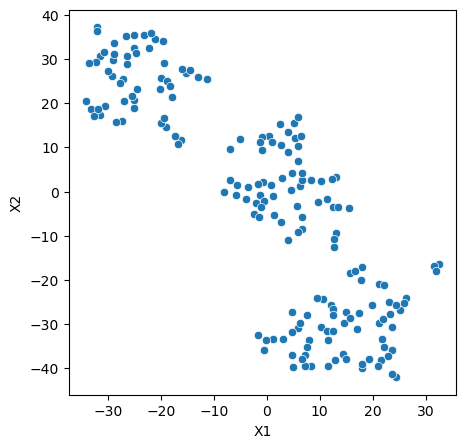

In [30]:
# Fitting t-SNE with number of components equal to 2
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 10)
data_tsne = tsne.fit_transform(data_scaled)

# Converting the embeddings to a dataframe
data_tsne = pd.DataFrame(data_tsne, columns = ["X1", "X2"])

# Scatter plot for two components
plt.figure(figsize = (5, 5))

sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)

plt.show()

 I will use the same k-Means clusters from before to colour code the data points

Text(0, 0.5, 'tsne component 2')

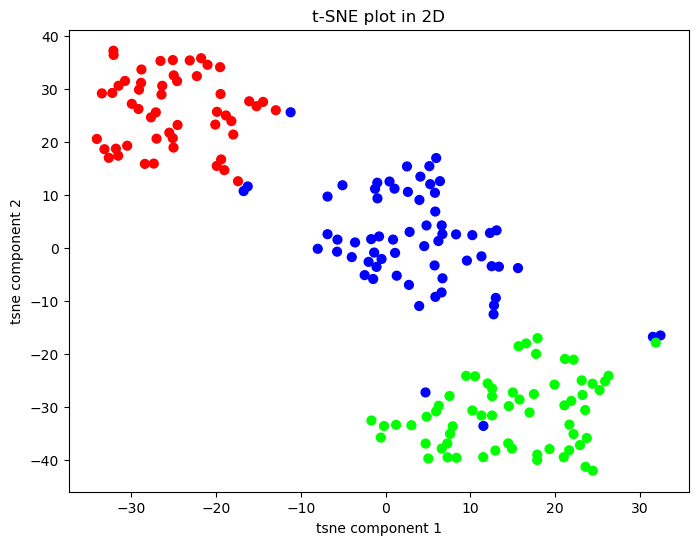

In [31]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(data_tsne.iloc[:,0], data_tsne.iloc[:,1], c=data_scaled_copy['KMeans_Labels'], cmap="brg", s=40)

# Aesthetics
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

There are three clearly defined clusters

# conclustion

There are three clearly defined clusters that become more visible with a t-sne and K-means.